# OTIMIZAÇÃO DAS DESPESAS COM MARKETING

O seguinte trabalho tem como objetivo dar soluções de como podemos traçar melhores estratégias com o nosso marketing dado o nosso estado atual.
Portanto primeiro precisamos compreender qual o nosso estado atual, e depois estabelecermos as ações 

In [168]:
#importando bibliotecas

import pandas as pd                            #pandas==2.2.2
import numpy as np                             #numpy==1.26.4       
from matplotlib import pyplot as plt           #matplotlib==3.8.4
import seaborn as sns                           #seaborn==0.13.2

In [76]:
#Aqui estarão escritas todas as funções que serão utilizadas no código principal

def snake_case(df):
    """
    Função que transforma o nome das colunas de um DataFrame em snake_case
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [77]:
#primeira vista do primeiro df

df = pd.read_csv('datasets/visits_log_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     100 non-null    object
 1   End Ts     100 non-null    object
 2   Source Id  100 non-null    int64 
 3   Start Ts   100 non-null    object
 4   Uid        100 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 4.0+ KB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### visits

O primeiro df vai nos mostrar os acessos ao site. Ele nos responde quem é o usuário, como que entrou, quando e a origem do anúncio que o trouxe.
Devemos:

    1- Converter as colunas de data para datetime, que será fundamental para analisarmos esses dados
    2 - Converter para category os dados em "device".
    3 - Seguir as normas que exigem o snake_case. No caso todas as colunas renomeadas em minúsculas e com underline.

O nome do df será visits

In [78]:
print(df['Device'].value_counts())

Device
desktop    73
touch      27
Name: count, dtype: int64


In [79]:
visits = pd.read_csv('datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates=['End Ts','Start Ts'])
visits = snake_case(visits)
print(visits.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


Não há valores nulos em <span style="color: red;">visits</span>.

In [80]:
#lendo o segundo dataset

df = pd.read_csv('datasets/orders_log_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   100 non-null    object 
 1   Revenue  100 non-null    float64
 2   Uid      100 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 2.5+ KB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### orders

O segundo df identifica valor e hora de cada pedido
Vamos fazer as mesmas configurações de visits:

    1 - Aplicar snake_case em todas as colunas;
    2 - converter para datetime "Buy Ts".

O df irá chamar orders.

In [81]:
orders = pd.read_csv('datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders = snake_case(orders)
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


Não há valores nulos em <span style="color: red;">orders</span>.

In [82]:
#lendo o terceiro dataset
df = pd.read_csv('datasets/costs_us.csv', nrows=100)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  100 non-null    int64  
 1   dt         100 non-null    object 
 2   costs      100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### costs

O ultimo df já tem as colunas configuradas, a unica alteração é a configuração da coluna dt que será convertido para datetime.

In [83]:
costs = pd.read_csv('datasets/costs_us.csv', parse_dates=['dt'])
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


Não há valores nulos em <span style="color: red;">costs</span>.

Agora com os dfs configurados podemos partir para analisar os dados deles mais de perto para conseguir avaliar qual o estado atual da empresa.


## Processando os dados da empresa

O roteiro para o processamento e compreensão dos dados da empresa será:

    1 - Produto: o que podemos avaliar sobre o uso do produto?
    2 - Vendas: qual a situação das vendas da empresa?
    3 - Marketing: o que podemos inferir sobre o marketing da empresa?




#### Produto:

In [84]:
# compreendendo a evolução do número de sessões ao longo do tempo

visits['day'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month

#tempo total das sessões	

visits['total_session'] = visits['end_ts'] - visits['start_ts']
visits['total_session'] = visits['total_session'].dt.seconds / 60
print(visits.head())

print("\n\n")
print(f'O df corresponde aos acessos desde o dia {visits['day'].min()} até o dia {visits['day'].max()}')



    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid         day  week  month  total_session  
0  16879256277535980062  2017-12-20    51     12           18.0  
1    104060357244891740  2018-02-19     8      2           28.0  
2   7459035603376831527  2017-07-01    26      7            0.0  
3  16174680259334210214  2018-05-20    20      5           24.0  
4   9969694820036681168  2017-12-27    52     12            0.0  



O df corresponde aos acessos desde o dia 2017-06-01 até o dia 2018-05-31


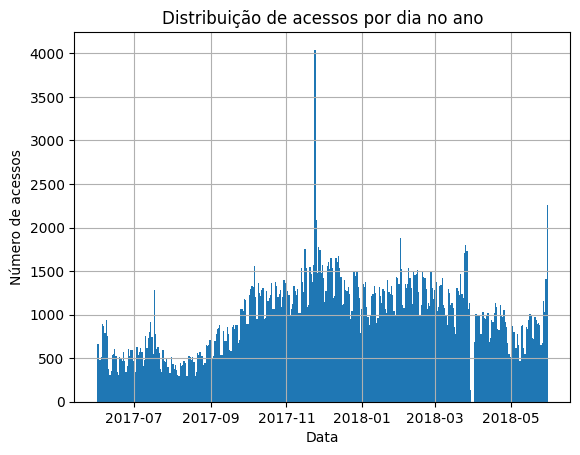

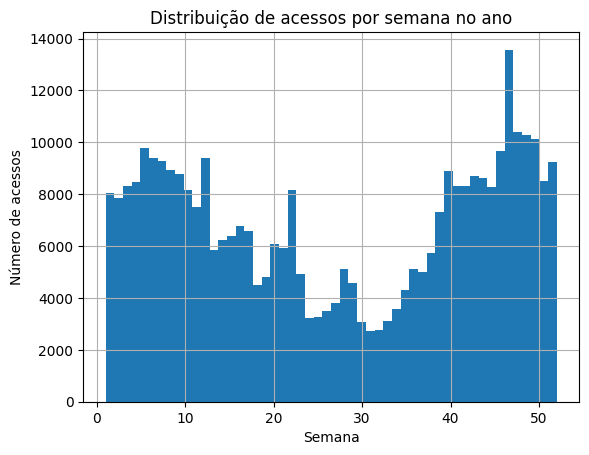

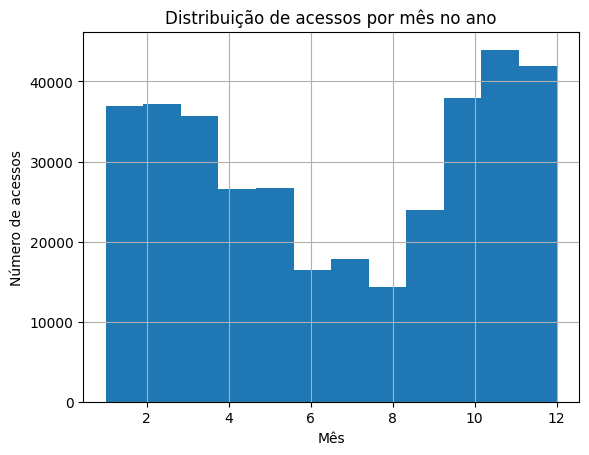

In [85]:

# histogramas

visits['day'].hist(bins=365)
plt.title('Distribuição de acessos por dia no ano')
plt.xlabel('Data')
plt.ylabel('Número de acessos')
plt.show()

visits['week'].hist(bins=52)
plt.title('Distribuição de acessos por semana no ano')
plt.xlabel('Semana')
plt.ylabel('Número de acessos')
plt.show()

visits['month'].hist(bins=12)
plt.title('Distribuição de acessos por mês no ano')
plt.xlabel('Mês')
plt.ylabel('Número de acessos')
plt.show()

É interessante notar que talvez haja um padrão entre os dias da semana na frequencia que vale a pena avaliar.

Além disso podemos ver que entre os meses de outubro e abril existe um maior numero de acessos. Com pico por volta do fim de novembro.

Talvez por conta da black friday? é uma hipotese que pode ser testada já que a black friday em 2017 caiu no dia 24 de novembro.

No fim de março ou inicio de Abril o site teve uma queda de acessos, é provável que tenha sido uma queda no servidor.

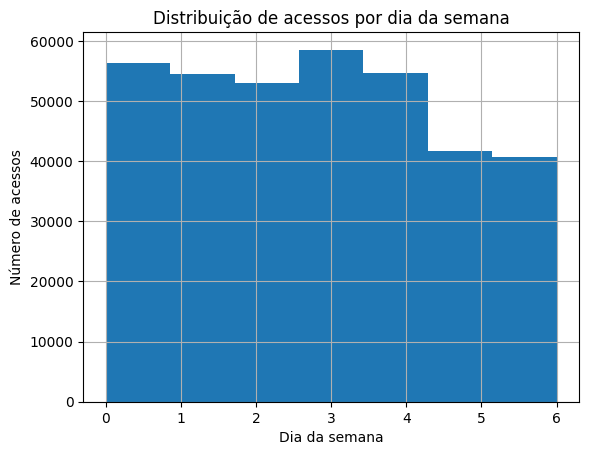

In [86]:
day_of_week = visits
day_of_week['day_of_week'] = day_of_week['start_ts'].dt.dayofweek
day_of_week['day_of_week'].hist(bins=7)
plt.title('Distribuição de acessos por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Número de acessos')
plt.show()

Podemos concluir que a hipótese que os acessos tinham um padrão semanal está confirmada.
No final de semana os acessos caem consideravelmente.

In [87]:
visits['day'].value_counts().head()

day
2017-11-24    4042
2018-05-31    2256
2017-11-25    2089
2018-02-01    1878
2018-03-26    1796
Name: count, dtype: int64

Aqui também podemos confirmar que o dia com mais acessos no ano foi justamente a black friday, 24 de novembro de 2017.

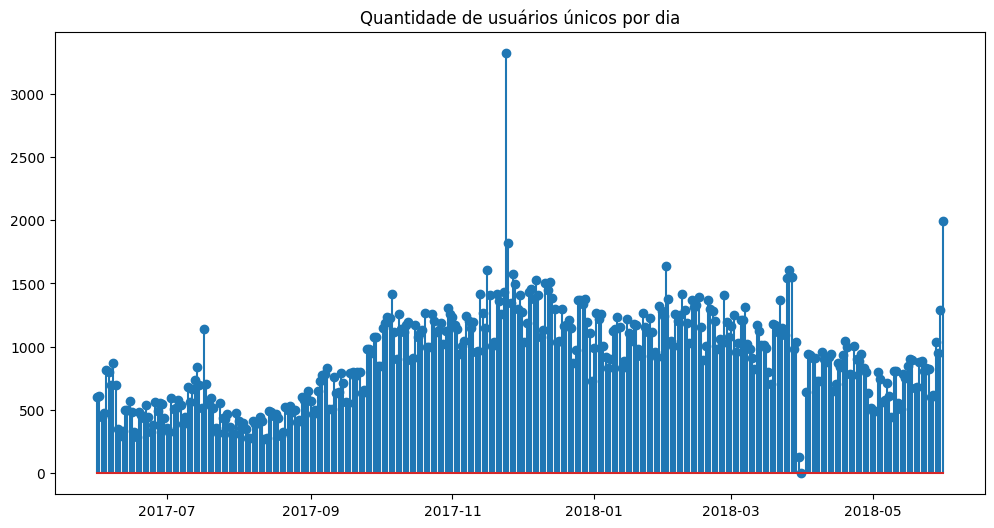

In [88]:
df = visits.groupby('day').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize=(12, 6))
plt.stem(df['day'], df['uid'])
plt.title('Quantidade de usuários únicos por dia')
plt.show()

O gráfico se parece muito com o gráfico de acesso por dia, podemos tentar entender quantos acessos em media acontecem por dia e quantos usuários por dia acessam e comparar os dois valores. Provavelmente a razão entre essas médias deve ser próxima de 1.

In [89]:
users_per_day = visits.groupby('day').agg({'uid':'nunique'}).mean()
sessions_per_day = visits.groupby('day').agg({'uid':'count'}).mean()
print(f'O número médio de visitantes por dia no site é de {users_per_day.iloc[0].round().astype(int)} usuários\n')
print(f'O número médio de acessos por dia no site é de {sessions_per_day.iloc[0].round().astype(int)}.\n\n')
print( "A razão entre o numero de acessos e usuários por dia é de {:.2f}.\nO que nos leva a afirmar que, em média, os usuários não acessam mais que uma vez o aplicativo no mesmo dia.".format((sessions_per_day/users_per_day).iloc[0]))

print("\n\nCom base nessa conclusão e no fato de como o gráfico de acessos por dia se parece muito com o gráfico de usuarios únicos por dia, \npodemos extrapolar que o grafico mensal e semanal dos dois também terão comportanmento semelhante")

O número médio de visitantes por dia no site é de 908 usuários

O número médio de acessos por dia no site é de 987.


A razão entre o numero de acessos e usuários por dia é de 1.09.
O que nos leva a afirmar que, em média, os usuários não acessam mais que uma vez o aplicativo no mesmo dia.


Com base nessa conclusão e no fato de como o gráfico de acessos por dia se parece muito com o gráfico de usuarios únicos por dia, 
podemos extrapolar que o grafico mensal e semanal dos dois também terão comportanmento semelhante


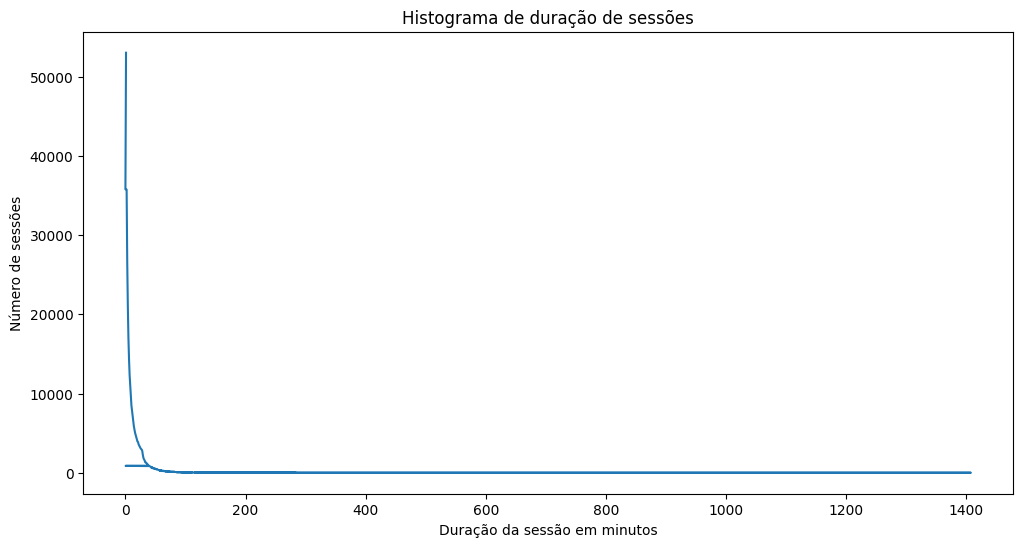

total_session
1.0    53029
0.0    35794
2.0    35748
3.0    26672
4.0    21085
5.0    17005
6.0    14316
7.0    12301
8.0    10973
9.0     9722
Name: count, dtype: int64


In [90]:
visits['total_session'].value_counts().plot( figsize=(12, 6))
plt.title("Histograma de duração de sessões")
plt.xlabel('Duração da sessão em minutos')
plt.ylabel('Número de sessões')
plt.show()
print(visits['total_session'].value_counts().head(10))

A curva exponencial apresenta que a imensa maioria das chamadas tem curta duração. Podemos focar em analisar apenas as sessões com mais expressividade.

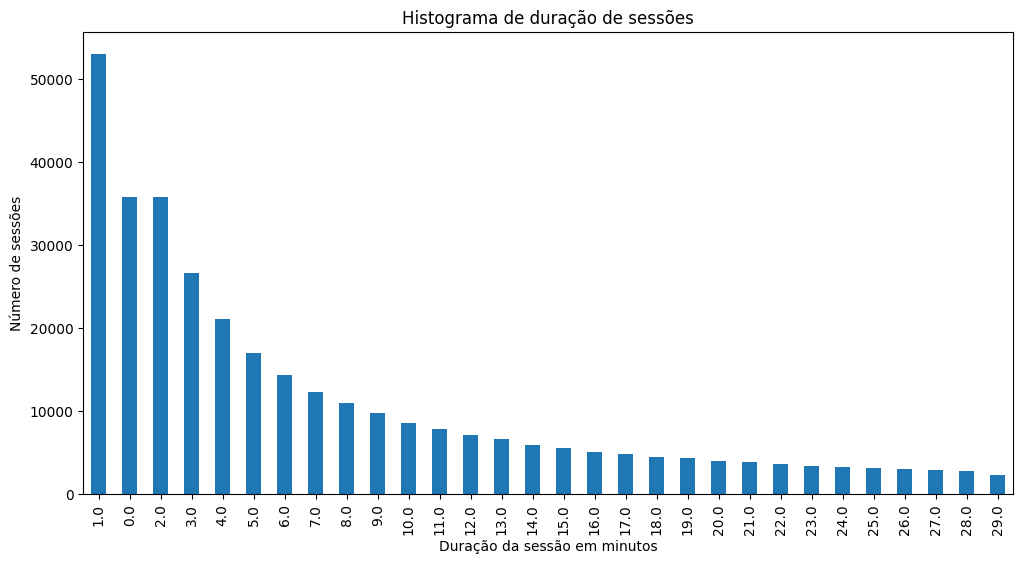

In [91]:
visits['total_session'].value_counts().head(30).plot(kind='bar',figsize=(12, 6))
plt.title("Histograma de duração de sessões")
plt.xlabel('Duração da sessão em minutos')
plt.ylabel('Número de sessões')
plt.show()

In [163]:
visits.head()
first_session = visits.groupby('uid').agg({'start_ts':'min'}).reset_index().rename(columns={'start_ts':'first_session'})
visits_ = visits.merge(first_session, on='uid', how='left')
visits_['month'] = visits_['start_ts'].dt.to_period('M')
visits_['first_session'] = visits_['first_session'].dt.to_period('M')
visits_['age'] = visits_['month'].astype('int64') - visits_['first_session'].astype('int64')

report = visits_.pivot_table(index='first_session', columns='age', values='uid', aggfunc='nunique')

report

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conseguimos assim entender como opera a retenção dos acessos, desde o primeiro acesso do usuário.

In [165]:
report_rates = report.copy()
for i in report_rates.columns[1:]:
    report_rates[i] = report_rates[i] / report_rates[0]
report_rates[0] = 1
report_rates.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session,,,,,,,,,,,,
2017-06,1,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1,0.05708,0.025454,0.020093,,,,,,,,


Fica muito mais claro agora como a retenção é péssima depois do primeiro mês.

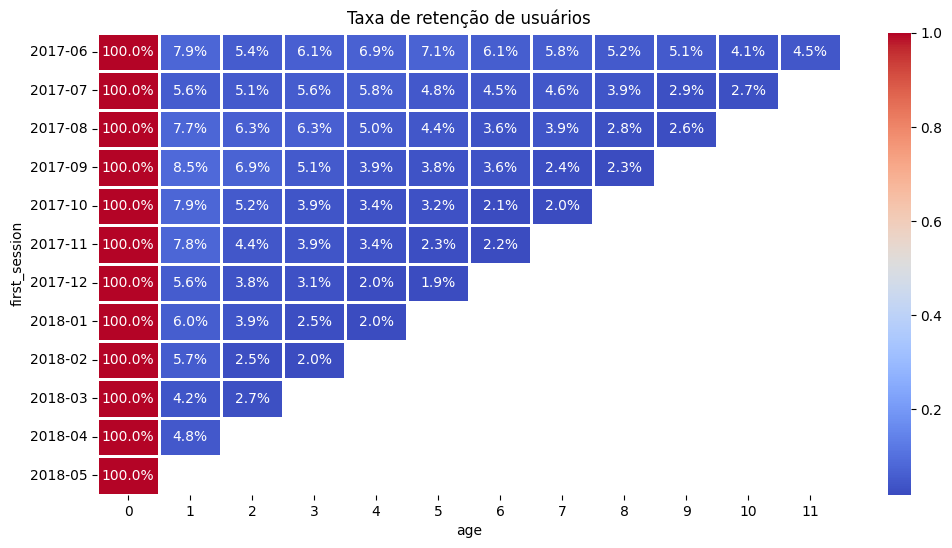

In [174]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(report_rates, annot = True, fmt='.1%', linewidths=1,cmap='coolwarm')
plt.title('Taxa de retenção de usuários')
plt.show()

### <span style="color: red;">Vendas</span>

Para entender as vendas da empresa vamos observar 4 metricas.

    1 - Como funciona a conversão dos clientes;
    2 - Como podemos entender a quantidade de compras;
    3 - O perfil de receita que os pedidos tem;
    4 - A receita que cada cliente trás.


##### 1 - CONVERSÃO


In [92]:
# criando os coortes

first_order = orders.groupby('uid')['buy_ts'].min().reset_index()

first_order.columns = ['uid', 'first_order']
first_order.head(10)

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
5,3077748354309989,2018-03-03 12:33:00
6,3605148382144603,2017-09-21 20:56:00
7,3753586865891862,2018-03-03 13:50:00
8,4808417689019433,2018-01-09 23:32:00
9,4992223027560440,2018-04-04 13:54:00


In [93]:
# para compreender o tempo de converção vamos precisar do auxilio do outro df e criar first_session

first_session = visits.groupby('uid')['start_ts'].min().reset_index()
first_session.columns = ['uid','first_session']

print(first_session.info(),"\n")
first_session.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   uid            228169 non-null  uint64        
 1   first_session  228169 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.5 MB
None 



,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
5,397399764396656,2018-01-18 12:32:00
6,407573351275847,2017-06-17 13:40:00
7,498809019029702,2018-02-21 22:09:00
8,526778907996220,2017-10-21 17:51:00
9,577434573913691,2018-01-28 14:15:00


Principais estatísticas sobre a conversão de usuários são:

Maior tempo para conversão: 363 days 07:04:00
Menor tempo para conversão: 0 days 00:00:00 - O que significa que foi menos de um minuto.
Tempo médio para conversão: 16 days 21:40:10.550064343
A mediana do tempo de conversão é de 16 minutos.
A moda do tempo de conversão é de 0   0 days 00:01:00
Name: time_to_convert, dtype: timedelta64[ns] 
Ou seja, um minuto.




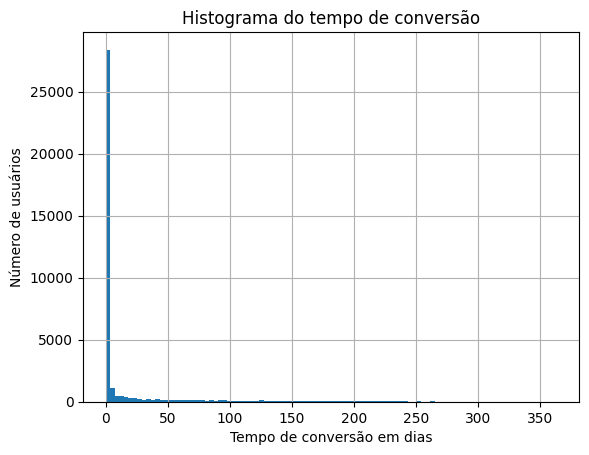

Dos usuários que fizeram pedidos:
72.2 % fizeram o primeiro pedido no mesmo dia que acessaram o site pela primeira vez.
83.7% fizeram o pedidos nos primeiros 16 dias desde o primeiro acesso


In [94]:
# primeiro criamos orders_ que terá as informações para fazer as analises de coorte
orders_ = pd.merge(orders, first_order, on='uid')
orders_['first_order'] = orders_['first_order'].dt.date

# agora criamos o df que nos mostram a conversão dos clientes
conversion = pd.merge(first_session, first_order, on='uid')
conversion['time_to_convert'] = conversion['first_order'] - conversion['first_session']
orders_convert = pd.merge(orders, conversion, on='uid')
# orders_convert tera as informações de orders: cliente,receita e data de compra
# e as informações de conversion: tempo de conversão e data da primeira sessão e data da primeira compra

# o df conversion contem o tempo de conversão para cada usuário
# orders_ contem a primeira ordem e a primeira sessão de cada usuário
# orders_convert contem as informações de orders e conversion

print(f'Principais estatísticas sobre a conversão de usuários são:\n')
print(f'Maior tempo para conversão: {conversion['time_to_convert'].max()}')
print(f'Menor tempo para conversão: {conversion['time_to_convert'].min()} - O que significa que foi menos de um minuto.')
print(f'Tempo médio para conversão: {conversion['time_to_convert'].mean()}')
print(f'A mediana do tempo de conversão é de {conversion['time_to_convert'].median()/np.timedelta64(1, 'm'):.0f} minutos.')
print(f'A moda do tempo de conversão é de {conversion['time_to_convert'].mode()} \nOu seja, um minuto.\n\n')

# time_to_convert tem em dias quanto tempo levou para o usuário converter, arredondado para baixo.add()
# usaremos ele para montar o histograma.

time_to_convert = (conversion['time_to_convert'].sort_values(ascending=False)/np.timedelta64(1, 'D')).astype(int)
time_to_convert.hist(bins=100)
plt.title('Histograma do tempo de conversão')
plt.xlabel('Tempo de conversão em dias')
plt.ylabel('Número de usuários')
plt.show()

total_users = time_to_convert.count()
print('Dos usuários que fizeram pedidos:\n{:.1f} % fizeram o primeiro pedido no mesmo dia que acessaram o site pela primeira vez.'.format((time_to_convert[time_to_convert<1].count()/total_users)*100))

print("{:.1f}% fizeram o pedidos nos primeiros 16 dias desde o primeiro acesso".format(time_to_convert[time_to_convert<=16].count()/total_users*100))


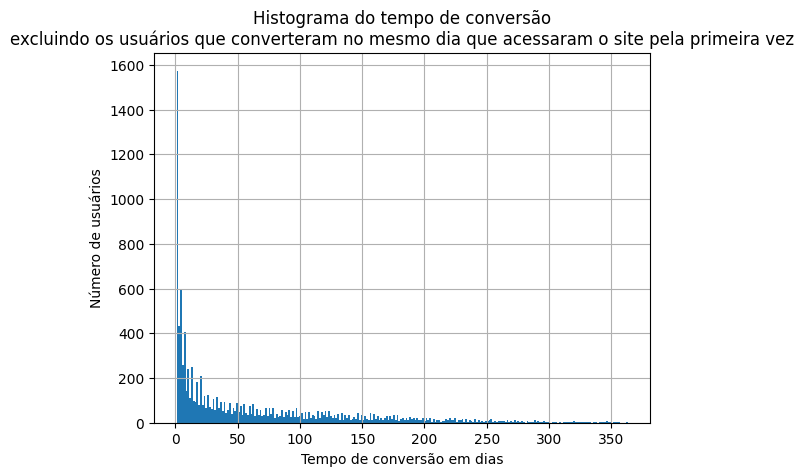

<Figure size 2000x600 with 0 Axes>

In [95]:
time_to_convert[time_to_convert>0].hist(bins=250)
plt.title('Histograma do tempo de conversão\nexcluindo os usuários que converteram no mesmo dia que acessaram o site pela primeira vez')
plt.xlabel('Tempo de conversão em dias')
plt.ylabel('Número de usuários')
plt.figure(figsize=(20, 6))
plt.show()

Aqui podemos ver com mais clareza, os dados que restaram ao excluirmos o primeiro dia, mas a curva exponencial se mantem pelo resto do DataFrame.

Para encerrar o assunto de conversão podemos analisar como funciona a retenção de compras.

In [184]:
# criação do df responsavel por apresentar os dados de retenção
order_retention = orders_.copy()
order_retention['first_order_month'] = pd.to_datetime(order_retention['first_order']).dt.to_period('M')
order_retention['order_month'] = order_retention['buy_ts'].dt.to_period('M')
order_retention['age'] = order_retention['order_month'].astype('int64') - order_retention['first_order_month'].astype('int64')


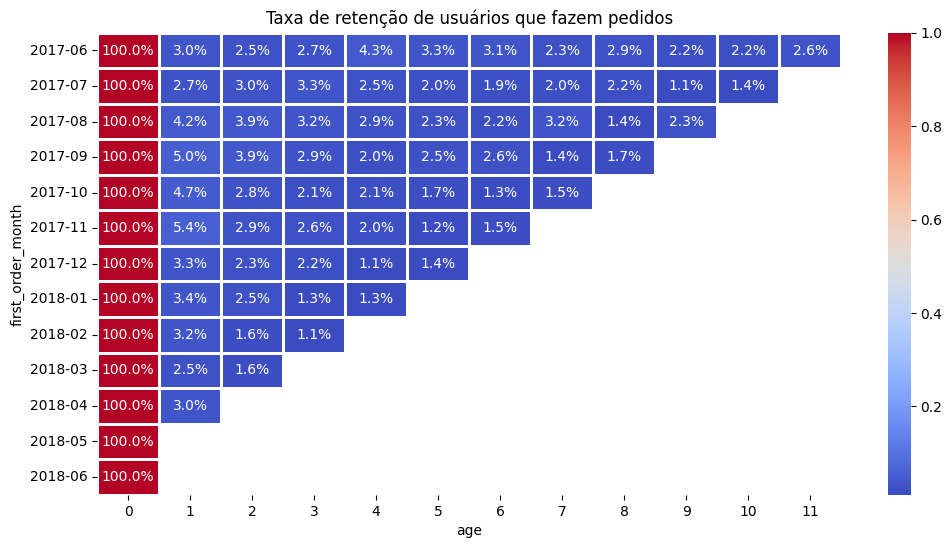

In [206]:
report = order_retention.pivot_table(index='first_order_month', columns='age', values='uid', aggfunc='nunique')

for i in report.columns[1:]:
    report[i] = report[i] / report[0]
report[0] = 1

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(report, annot = True, fmt='.1%', linewidths=1,cmap='coolwarm')
plt.title('Taxa de retenção de usuários que fazem pedidos')
plt.show()


É gritante a baixa retenção que temos depois do primeiro mês de compra também.

##### 2 - QUANTIDADE DE COMPRAS

In [201]:
# podemos continuar usando order_retention para criar order_volume
order_volume = order_retention.copy()
order_volume = order_volume.groupby(['uid','first_order_month', 'age']).agg({'revenue':'count'}).rename(columns={'revenue':'total_orders'}).reset_index()

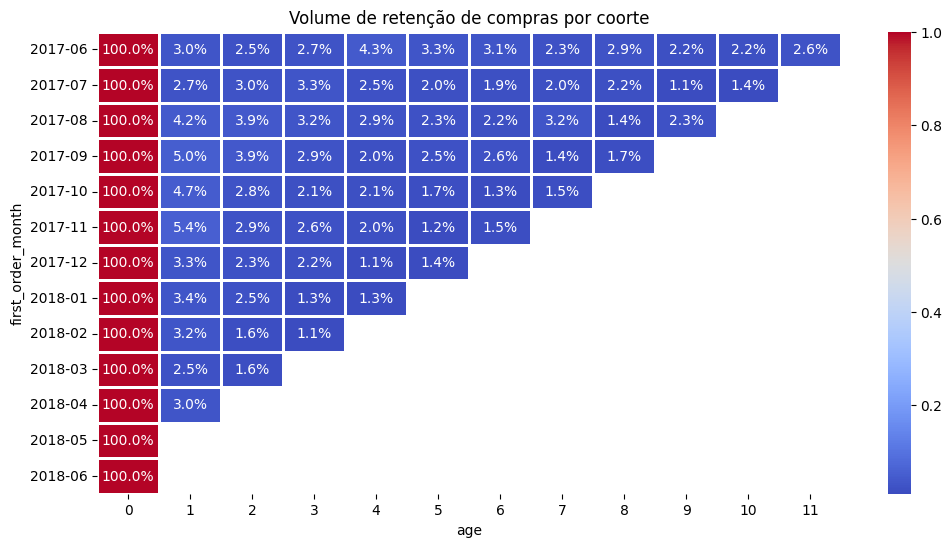

O volume total de compras, por todo o período, foi de: 50415


In [210]:
result = order_volume.pivot_table(index='first_order_month', columns='age', values='total_orders', aggfunc='sum')
for i in report.columns[1:]:
    report[i] = report[i] / report[0]
report[0] = 1

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(report, annot = True, fmt='.1%', linewidths=1,cmap='coolwarm')
plt.title('Volume de retenção de compras por coorte')
plt.show()

total_orders = order_volume['total_orders'].sum()
print("O volume total de compras, por todo o período, foi de: {}".format(total_orders))

In [218]:
# e agora vamor
order_revenue = order_retention.copy()
order_revenue = order_revenue.groupby(['uid','first_order_month', 'age']).agg({'revenue':'sum'}).rename(columns={'revenue':'total_revenue'}).reset_index()
total_revenue = order_revenue['total_revenue'].sum()
result = order_revenue.pivot_table(index='first_order_month', columns='age', values='total_revenue', aggfunc='sum')

result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,9557.49,981.82,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,
2017-08,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,,
2017-09,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,,,
2017-10,21716.20,2325.21,830.65,682.01,657.77,522.37,368.1,501.14,,,,
2017-11,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,,,,,
2017-12,20767.49,1141.22,4054.7,4669.1,1371.57,1481.66,,,,,,
2018-01,13949.50,994.22,1026.34,481.59,211.48,,,,,,,
2018-02,15177.16,1015.98,286.66,270.7,,,,,,,,


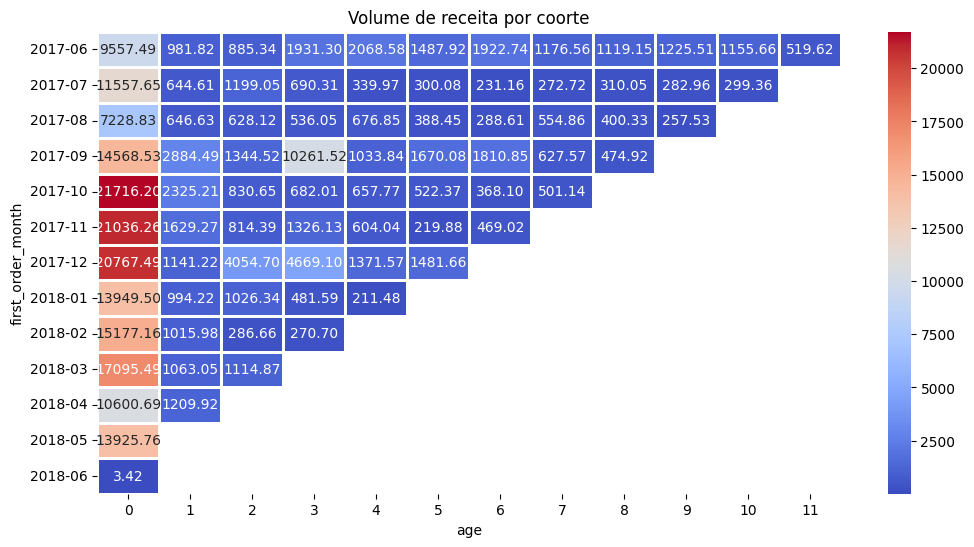


O volume total de receita, por todo o período, foi de: R$ 252057.20


In [229]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(result, linewidths=1,annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Volume de receita por coorte')
plt.show()

print("\nO volume total de receita, por todo o período, foi de: R$ {:.2f}".format(total_revenue))

##### 3 - RECEITA DE CADA PEDIDO
O volume médio de compra é o total de receita pelo numero de compras

In [230]:
mean_revenue = total_revenue / total_orders
print("\nA média de receita por pedido é de R$ {:.2f}".format(mean_revenue))


A média de receita por pedido é de R$ 5.00


##### 4 - RECEITA QUE CADA CLIENTE TRAS

In [236]:
cohort_sizes = order_retention.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [237]:
order_retention_ = pd.merge(order_retention, cohort_sizes, on='first_order_month')
cohorts = order_retention_.groupby(['first_order_month', 'age']).agg({'revenue':'sum'}).reset_index()
report = cohorts.merge(cohort_sizes, on='first_order_month')


In [243]:
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order_month,age,revenue,n_buyers,ltv
0,2017-06,0,9557.49,2023,4.724414
1,2017-06,1,981.82,2023,0.485329
2,2017-06,2,885.34,2023,0.437637
3,2017-06,3,1931.30,2023,0.954671
4,2017-06,4,2068.58,2023,1.022531


In [244]:
result = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum').cumsum(axis=1)
result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02,4.156987,4.435262,4.513777,4.587921,,,,,,,,


### <span style="color: red;">MARKETING</span>

Aqui processamos os dados de marketing e buscamos entender:

    1 - Como tem sido os gastos com marketing;
    2 - Qual o custo com marketing por cliente agregado;
    3 - ROI

In [246]:
# qual o gasto mensal com marketing?
costs['month'] = costs['dt'].dt.to_period('M')
monthly_costs = costs.groupby('month').agg({'costs':'sum'}).reset_index()
monthly_costs.head()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


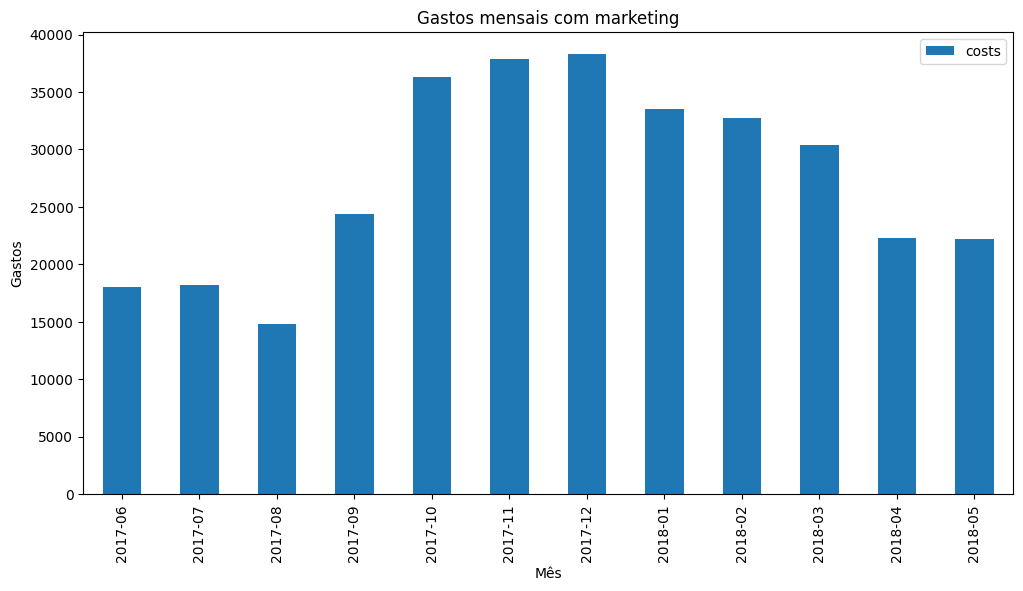

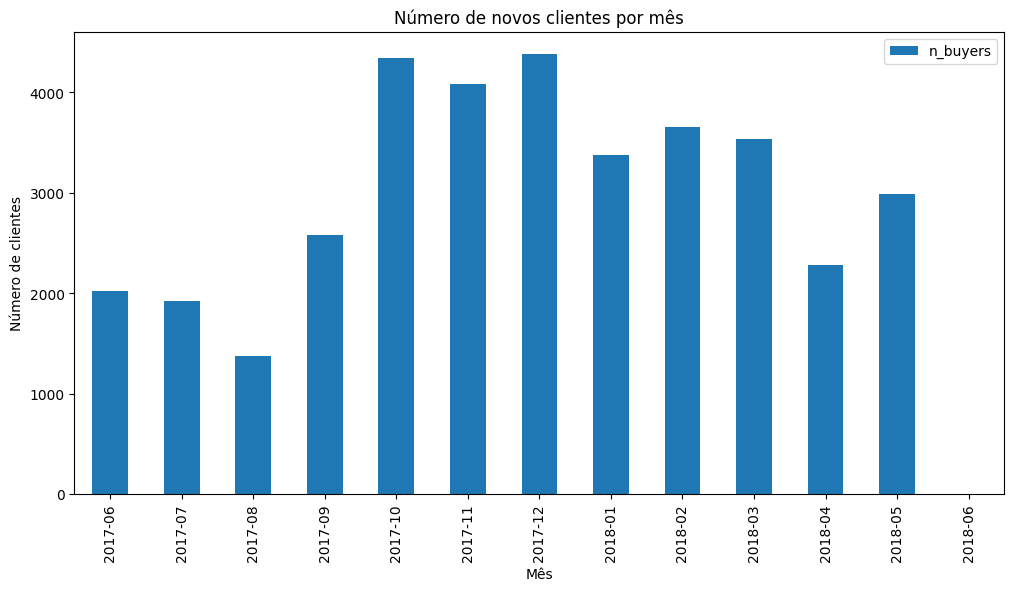

In [252]:
monthly_costs.plot(x='month', y='costs', kind='bar', figsize=(12, 6))
plt.title('Gastos mensais com marketing')
plt.xlabel('Mês')
plt.ylabel('Gastos')
plt.show()

cohort_sizes.plot(x='first_order_month', y='n_buyers', kind='bar', figsize=(12, 6))
plt.title('Número de novos clientes por mês')
plt.xlabel('Mês')
plt.ylabel('Número de clientes')
plt.show()

Esses gráficos conseguem mostrar pra gente de maneira clara como os gastos com marketing são acompanhados com a aquisição de novos clientes.

In [249]:
# calculo do cac
df_cac = pd.merge(monthly_costs, cohort_sizes, left_on='month', right_on='first_order_month')

In [250]:
df_cac['cac'] = df_cac['costs'] / df_cac['n_buyers']
df_cac

,month,costs,first_order_month,n_buyers,cac
0,2017-06,18015.00,2017-06,2023,8.905091
1,2017-07,18240.59,2017-07,1923,9.485486
2,2017-08,14790.54,2017-08,1370,10.796015
3,2017-09,24368.91,2017-09,2581,9.441654
4,2017-10,36322.88,2017-10,4340,8.369327
5,2017-11,37907.88,2017-11,4081,9.288870
6,2017-12,38315.35,2017-12,4383,8.741809
7,2018-01,33518.52,2018-01,3373,9.937302
8,2018-02,32723.03,2018-02,3651,8.962758
9,2018-03,30415.27,2018-03,3533,8.608907


In [263]:
report_cac = df_cac.pivot_table(index='first_order_month', values='cac', aggfunc='sum')
report_cac.fillna('')

,cac
first_order_month,
2017-06,8.905091
2017-07,9.485486
2017-08,10.796015
2017-09,9.441654
2017-10,8.369327
2017-11,9.288870
2017-12,8.741809
2018-01,9.937302
2018-02,8.962758


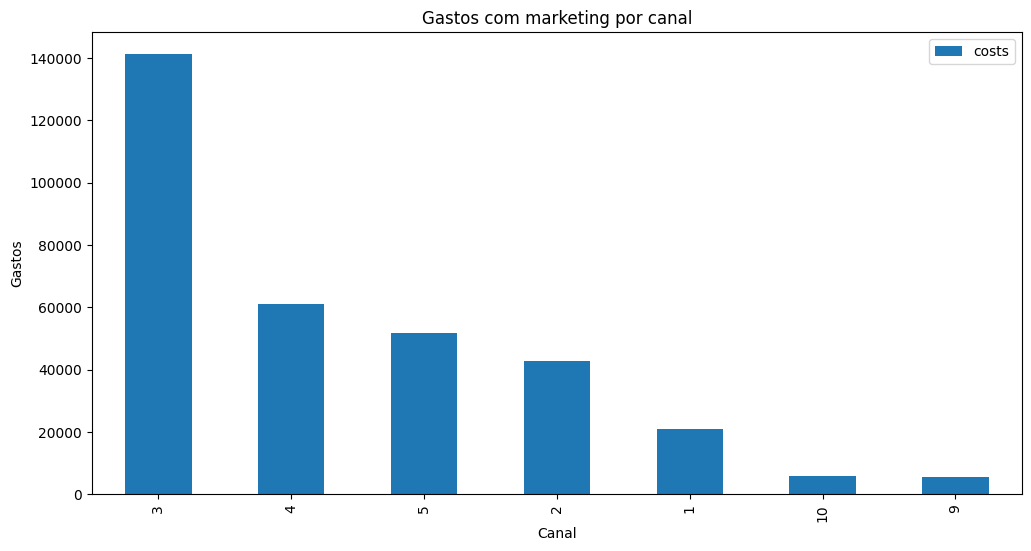

In [264]:
source_costs = costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
source_costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs', ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Gastos com marketing por canal')
plt.xlabel('Canal')
plt.ylabel('Gastos')
plt.show()

Conseguimos avaliar em quais canais de marketing a empresa tem preferência.

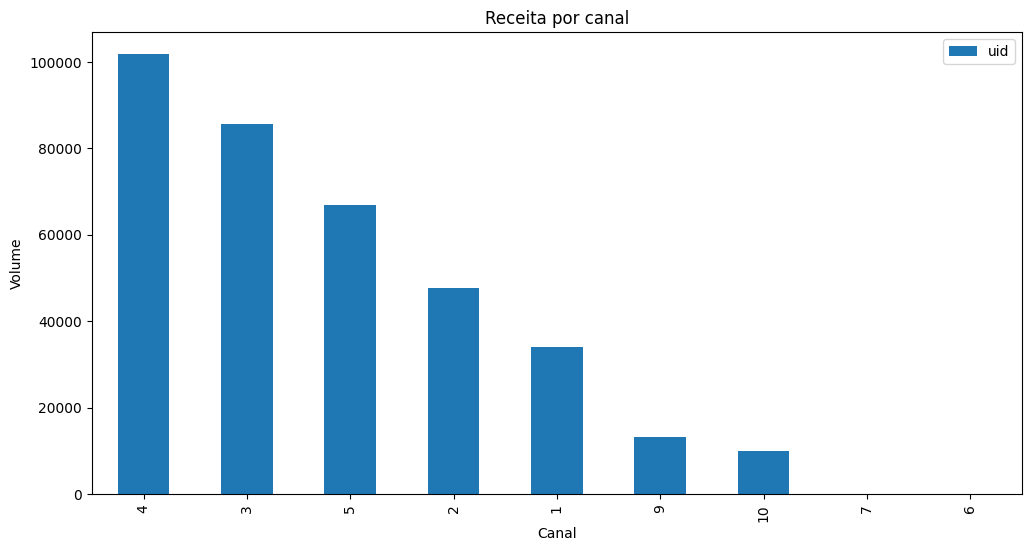

In [273]:
source_visits= visits.groupby('source_id').agg({'uid':'count'}).reset_index()
source_visits.sort_values(by='uid', ascending=False).plot(x='source_id', y='uid', kind='bar', figsize=(12, 6))
plt.title('Receita por canal')
plt.xlabel('Canal')
plt.ylabel('Volume')
plt.show()

Comparando os gráficos podemos perceber como alguns canais de marketing são mais rentaveis em acesso do que outros.
Como por exemplo o canal 4 que pelo valor gasto já é mais rentavel que o 3.

In [278]:
df_ltv = report.groupby('first_order_month').agg({'ltv':'sum'}).reset_index()
df_ltv

,first_order_month,ltv
0,2017-06,11.879234
1,2017-07,8.386854
2,2017-08,8.471723
3,2017-09,13.435227
4,2017-10,6.360242
5,2017-11,6.395244
6,2017-12,7.639913
7,2018-01,4.940151
8,2018-02,4.587921
9,2018-03,5.455253


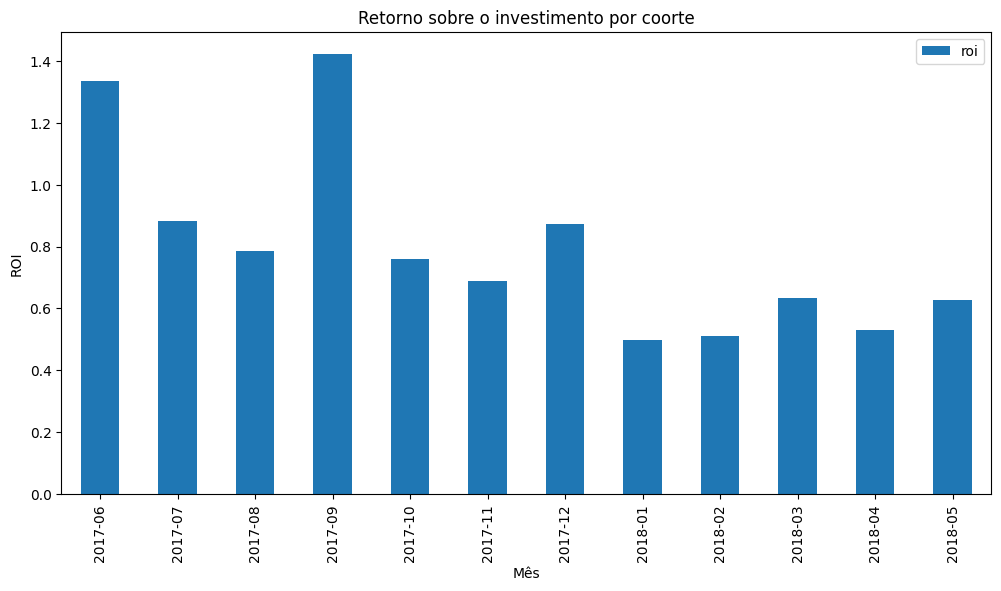

In [280]:
df_roi = pd.merge(df_ltv, df_cac, left_on='first_order_month', right_on='first_order_month')
df_roi['roi'] = df_roi['ltv'] / df_roi['cac']


plot = df_roi.plot(x='first_order_month', y='roi', kind='bar', figsize=(12, 6))
plt.title('Retorno sobre o investimento por coorte')
plt.xlabel('Mês')
plt.ylabel('ROI')
plt.show()


## CONCLUSÃO

A partir do gráfico 'Retorno sobre o investimento por coorte' conseguimos concluir que apenas os clientes de junho e setembro tiveram ROI acima de 1,0.
Dezembro chamou atenção também, talvez por ser o período de festas de Natal e ano novo.

Infelizmente é notável que os acessos da black friday, em novembro, não foram convertidos em clientes com alto ROI. Interessante repensar a estratégia da empresa nesse ano, pois existe campo para melhorias.

O mês de setembro também deve ser estudado com mais atenção pois os clientes que fizeram seu primeiro pedido nesse mês também tem gerado uma receita melhor para a empresa.

O canal de marketing 4 é mais interessante que o 3 para atrair novos acessos, pois teve menos custo e com um retorno mais de acessos.